In [1]:
import os
import glob
import shutil
import random

In [2]:
os.chdir('/Users/kshitijaupasham/Desktop/cell_images/')

if(os.path.isdir('train/Uninfected') is False):
    print("INSIDE")
    os.makedirs('train/Uninfected')
    os.makedirs('train/Parasitized')
    os.makedirs('test/Uninfected')
    os.makedirs('test/Parasitized')
    
    
    os.chdir('/Users/kshitijaupasham/Desktop/cell_images/Uninfected/')
    for img in random.sample(glob.glob('*.png'),12400):
        shutil.move(img,'/Users/kshitijaupasham/Desktop/cell_images/train/Uninfected')
    for img in random.sample(glob.glob('*.png'),1379):
        shutil.move(img,'/Users/kshitijaupasham/Desktop/cell_images/test/Uninfected')
        
    os.chdir('/Users/kshitijaupasham/Desktop/cell_images/Parasitized/')
    for img in random.sample(glob.glob('*.png'),12400):
        shutil.move(img,'/Users/kshitijaupasham/Desktop/cell_images/train/Parasitized')
    for img in random.sample(glob.glob('*.png'),1379):
        shutil.move(img,'/Users/kshitijaupasham/Desktop/cell_images/test/Parasitized')
os.chdir('../../')        

In [3]:
thresh = 0.9565

In [4]:
from tensorflow.keras.callbacks import Callback
class myCallback(Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > thresh):   
            self.model.stop_training = True

In [5]:
callbacks = myCallback()

In [6]:
from keras.callbacks import ReduceLROnPlateau
rlrop = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2)

In [7]:
train_path = '/Users/kshitijaupasham/Desktop/cell_images/train/'
test_path = '/Users/kshitijaupasham/Desktop/cell_images/test/'

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1 / 255.0,
                                   rotation_range=20,
                                   zoom_range=0.05,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   shear_range=0.05,
                                   horizontal_flip=True,
                                   fill_mode="nearest")
test_datagen = ImageDataGenerator(rescale=1./255)


train = train_datagen.flow_from_directory(train_path,
                                          target_size=(64, 64),
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32)
test = test_datagen.flow_from_directory(test_path,
                                        target_size=(64, 64),
                                        color_mode='rgb',
                                        class_mode='binary',
                                        batch_size=32)

Found 24798 images belonging to 2 classes.
Found 2758 images belonging to 2 classes.


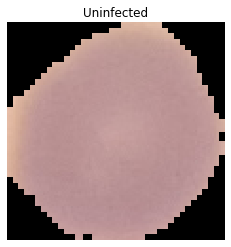

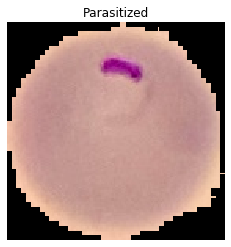

In [9]:
import cv2 
import matplotlib.pyplot as plt

img = cv2.imread('/Users/kshitijaupasham/Desktop/cell_images/train/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png') 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Uninfected')
plt.axis('off')
plt.show()

img = cv2.imread('/Users/kshitijaupasham/Desktop/cell_images/train/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_181.png') 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Parasitized')
plt.axis('off')
plt.show()


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3),padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size = (3,3),activation ='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = (3,3),activation ='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(64, activation = "relu",kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(32, activation = "relu",kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1, activation = "sigmoid"))



In [11]:
from tensorflow.keras.optimizers import Adam

epochs = 20
optimizer = Adam(lr=0.001, decay=0.001 / epochs)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [13]:
train_steps=train.n//train.batch_size
validation_steps=test.n//test.batch_size
history = model.fit(train,steps_per_epoch=train_steps,validation_data=test,validation_steps=validation_steps,epochs=epochs, callbacks=[callbacks,rlrop])

Epoch 1/20
774/774 [==============================] - 162s 210ms/step - loss: 0.2971 - accuracy: 0.8693 - val_loss: 0.1805 - val_accuracy: 0.9328 - lr: 0.0010
Epoch 2/20
774/774 [==============================] - 157s 203ms/step - loss: 0.1649 - accuracy: 0.9452 - val_loss: 0.3093 - val_accuracy: 0.8623 - lr: 0.0010
Epoch 3/20
774/774 [==============================] - 157s 203ms/step - loss: 0.1511 - accuracy: 0.9506 - val_loss: 0.1690 - val_accuracy: 0.9509 - lr: 0.0010
Epoch 4/20
774/774 [==============================] - 156s 201ms/step - loss: 0.1411 - accuracy: 0.9549 - val_loss: 0.1622 - val_accuracy: 0.9422 - lr: 0.0010
Epoch 5/20
774/774 [==============================] - 153s 198ms/step - loss: 0.1352 - accuracy: 0.9551 - val_loss: 0.1468 - val_accuracy: 0.9473 - lr: 0.0010
Epoch 6/20
774/774 [==============================] - 159s 205ms/step - loss: 0.1226 - accuracy: 0.9599 - val_loss: 0.1336 - val_accuracy: 0.9509 - lr: 1.0000e-04
Epoch 7/20
774/774 [======================

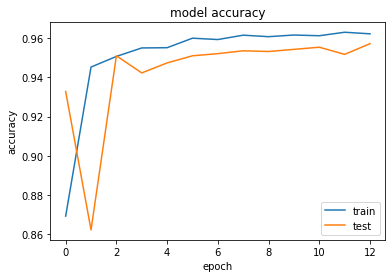

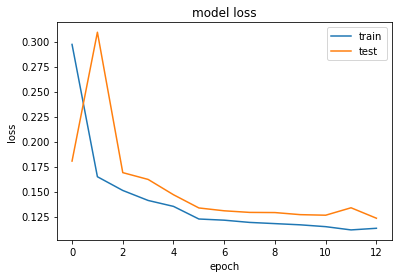

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [16]:
95.71

95.71